## Data Loading

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
telemetry = pd.read_csv('./telemetry_cleaned.csv')
X = telemetry[['Easting', 'Northing', 'WaterDepth']].head(10000)
X.head(5)

,Easting,Northing,WaterDepth
0,0.158187,0.410159,92.93
1,0.158187,0.410159,5.86
2,0.534407,0.535898,5.86
3,0.534311,0.535924,6.33
4,0.533734,0.536254,7.02


### Raw Plot

In [3]:
def plot2d(data):
	data.plot(kind='scatter', x='Easting', y='Northing', color='#1F77B4')

def plot3d(data, title):
	fig = plt.figure()
	ax = fig.add_subplot(projection='3d')
	ax.scatter(data['Easting'], data['Northing'], data['WaterDepth'])
	ax.set_xlabel('Easting')
	ax.set_ylabel('Northing')
	ax.set_label
	ax.set_zlabel('WaterDepth')
	ax.set_title(title)
	plt.show()

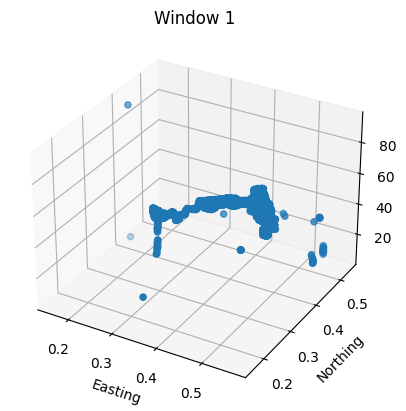

In [4]:
plot3d(X, 'Window 1')

### Grid Search

In [5]:
def grid_search_dbscan(data, options, verbose=False):
	results = []

	# Iterate through all combinations of options
	# And perform a DBSCAN evaluation on each
	option_combs = itertools.product(*options.values())

	for eps, min_samples in list(option_combs):
		if verbose: print(f'Running eps={eps}, min_samples={min_samples}')

		db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
		labels = db.labels_

		# Get estimated number of clusters and noise points
		clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
		noise = list(labels).count(-1)

		# Silhouette Coefficient
		silhouette = metrics.silhouette_score(X, labels)

		# Davies-Bouldin Score
		davies_bouldin = metrics.davies_bouldin_score(X, labels)

		if verbose: print(f'Finished with silhouette={silhouette}, davies={davies_bouldin}')

		results.append({
			'eps': eps,
			'min_samples': min_samples,
			'clusters': clusters,
			'noise': noise,
			'silhouette': silhouette,
			'davies_bouldin': davies_bouldin
		})

	return pd.DataFrame(results)

In [6]:
# Run grid search with the following options
options = {
	"eps": [0.1, 0.15, 0.2],
	"min_samples": [6, 7, 8, 9, 10, 11, 12]
}

results = grid_search_dbscan(X, options, True)

Running eps=0.1, min_samples=6
Finished with silhouette=0.5680589296430492, davies=1.715054422290236
Running eps=0.1, min_samples=7
Finished with silhouette=0.6022754363136475, davies=1.8891777565713148
Running eps=0.1, min_samples=8
Finished with silhouette=0.6101672027104185, davies=2.7401712333287476
Running eps=0.1, min_samples=9
Finished with silhouette=0.6088178500953589, davies=4.069587567644676
Running eps=0.1, min_samples=10
Finished with silhouette=0.6066684454445834, davies=13.597542222918886
Running eps=0.1, min_samples=11
Finished with silhouette=0.6022185459442788, davies=4.895032227290086
Running eps=0.1, min_samples=12
Finished with silhouette=0.631617243070789, davies=5.673908727151877
Running eps=0.15, min_samples=6
Finished with silhouette=0.46710958336682223, davies=1.2047327074421348
Running eps=0.15, min_samples=7
Finished with silhouette=0.45269617325781775, davies=1.1349607759805471
Running eps=0.15, min_samples=8
Finished with silhouette=0.6612577219825756, dav

In [7]:
results

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.10,6,21,198,0.568059,1.715054
1,0.10,7,20,227,0.602275,1.889178
2,0.10,8,17,262,0.610167,2.740171
3,0.10,9,17,286,0.608818,4.069588
4,0.10,10,18,309,0.606668,13.597542
5,0.10,11,19,328,0.602219,4.895032
6,0.10,12,17,364,0.631617,5.673909
7,0.15,6,11,129,0.467110,1.204733
8,0.15,7,13,136,0.452696,1.134961
9,0.15,8,16,149,0.661258,1.242117


Row with best silhouette score

In [8]:
best_silh = results.sort_values(by='silhouette', ascending=False, ignore_index=True).head(5)
best_silh

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.15,9,17,161,0.661533,1.226655
1,0.15,8,16,149,0.661258,1.242117
2,0.15,10,15,190,0.652077,1.440715
3,0.10,12,17,364,0.631617,5.673909
4,0.10,8,17,262,0.610167,2.740171


Row with best davies-bouldin score

In [9]:
best_davies = results.sort_values(by='davies_bouldin', ascending=True, ignore_index=True).head(5)
best_davies

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.2,6,4,107,0.462712,0.861262
1,0.2,8,4,108,0.462649,0.874315
2,0.2,7,4,108,0.462649,0.874315
3,0.2,11,7,109,0.492350,0.892847
4,0.2,9,5,108,0.399034,0.900504


### Fine-tuning

In [32]:
# Run grid search with the following options
options_ft = {
	"eps": [0.19, 0.2, 0.21],
	"min_samples": [12, 13, 14]
}

results_ft = grid_search_dbscan(X, options_ft, True)

Running eps=0.19, min_samples=12
Finished with silhouette=0.5109505916720622, davies=1.1020650688931917
Running eps=0.19, min_samples=13
Finished with silhouette=0.7181031436768913, davies=1.214041249990363
Running eps=0.19, min_samples=14
Finished with silhouette=0.7174544054426563, davies=1.2386827394054514
Running eps=0.2, min_samples=12
Finished with silhouette=0.5250036851969186, davies=0.9251837738491291
Running eps=0.2, min_samples=13
Finished with silhouette=0.7089429628648815, davies=0.9865290181920289
Running eps=0.2, min_samples=14
Finished with silhouette=0.7191176114880448, davies=1.1488783777294822
Running eps=0.21, min_samples=12
Finished with silhouette=0.5229030362037271, davies=0.8539023021486871
Running eps=0.21, min_samples=13
Finished with silhouette=0.7218712659638079, davies=0.8274044415547801
Running eps=0.21, min_samples=14
Finished with silhouette=0.711448689280707, davies=0.8812000181147732


In [42]:
results_ft

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.19,12,8,135,0.510951,1.102065
1,0.19,13,8,151,0.718103,1.214041
2,0.19,14,9,154,0.717454,1.238683
3,0.20,12,7,115,0.525004,0.925184
4,0.20,13,9,126,0.708943,0.986529
5,0.20,14,8,141,0.719118,1.148878
6,0.21,12,5,108,0.522903,0.853902
7,0.21,13,8,109,0.721871,0.827404
8,0.21,14,9,116,0.711449,0.881200


In [43]:
best_silh_ft = results_ft.sort_values(by='silhouette', ascending=False, ignore_index=True).head(5)
best_silh_ft

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.21,13,8,109,0.721871,0.827404
1,0.20,14,8,141,0.719118,1.148878
2,0.19,13,8,151,0.718103,1.214041
3,0.19,14,9,154,0.717454,1.238683
4,0.21,14,9,116,0.711449,0.881200


In [44]:
best_davies_ft = results_ft.sort_values(by='davies_bouldin', ascending=True, ignore_index=True).head(5)
best_davies_ft

,eps,min_samples,clusters,noise,silhouette,davies_bouldin
0,0.21,13,8,109,0.721871,0.827404
1,0.21,12,5,108,0.522903,0.853902
2,0.21,14,9,116,0.711449,0.881200
3,0.20,12,7,115,0.525004,0.925184
4,0.20,13,9,126,0.708943,0.986529


In [56]:
print('Silhouette', best_silh['silhouette'][1], 'Davies-Bouldin', best_silh['davies_bouldin'][1])
print(f"Silhouette i: {best_silh_ft['silhouette'][0] - best_silh['silhouette'][1]}")
print(f"Davies-Bouldin i: {best_silh_ft['davies_bouldin'][0] - best_silh['davies_bouldin'][1]}")

Silhouette 0.7089429628648815 Davies-Bouldin 0.9865290181920289
Silhouette i: 0.012928303098926452
Davies-Bouldin i: -0.15912457663724877
